In [1]:
import os
>>> os.system("wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data >& /dev/null")

0

Need to run `pip install numpy pandas` before running in this notebook.

In [2]:
import numpy as np
import pandas as pd
iris = pd.read_csv("iris.data", names=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Name"])
iris.head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

In [3]:
iris.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')

In [4]:
iris.assign(sepal_ratio=iris["SepalWidth"] / iris["SepalLength"]).head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name  sepal_ratio
0          5.1         3.5          1.4         0.2  Iris-setosa     0.686275
1          4.9         3.0          1.4         0.2  Iris-setosa     0.612245
2          4.7         3.2          1.3         0.2  Iris-setosa     0.680851
3          4.6         3.1          1.5         0.2  Iris-setosa     0.673913
4          5.0         3.6          1.4         0.2  Iris-setosa     0.720000

In [5]:
iris.assign(sepal_ratio=lambda x: (x["SepalWidth"] / x["SepalLength"])).head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name  sepal_ratio
0          5.1         3.5          1.4         0.2  Iris-setosa     0.686275
1          4.9         3.0          1.4         0.2  Iris-setosa     0.612245
2          4.7         3.2          1.3         0.2  Iris-setosa     0.680851
3          4.6         3.1          1.5         0.2  Iris-setosa     0.673913
4          5.0         3.6          1.4         0.2  Iris-setosa     0.720000

In [6]:
iris.head(2)

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa

<AxesSubplot:xlabel='SepalRatio', ylabel='PetalRatio'>

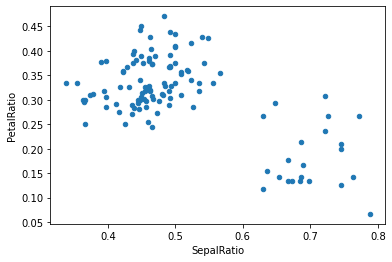

In [7]:
import matplotlib
(
     iris.query("SepalLength > 5")
     .assign(
         SepalRatio=lambda x: x.SepalWidth / x.SepalLength,
         PetalRatio=lambda x: x.PetalWidth / x.PetalLength,
     )
     .plot(kind="scatter", x="SepalRatio", y="PetalRatio")
 )

Now we'll be using the dataset to do some machine learning with Keras and Scikit-learn (Sklearn).

Don't forget to run `pip install keras sklearn tensorflow` before running in this notebook. (Tensorflow is needed by Keras.)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [9]:
# Setting the random seed for reproducibility
np.random.seed(7)

In [10]:
# Downloading the data again (URL can be passed to read_csv)
dataframe = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
dataset = dataframe.values
# Formatting the data slightly differently from the dataframe
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

In [11]:
# Prints the array shapes
print(X.shape, Y.shape)

# Prints the first few rows
print(pd.DataFrame(zip(X[0:150:10], Y[0:150:10]), columns=["Features", "Class"]))

(150, 4) (150,)
                Features            Class
0   [5.1, 3.5, 1.4, 0.2]      Iris-setosa
1   [5.4, 3.7, 1.5, 0.2]      Iris-setosa
2   [5.4, 3.4, 1.7, 0.2]      Iris-setosa
3   [4.8, 3.1, 1.6, 0.2]      Iris-setosa
4   [5.0, 3.5, 1.3, 0.3]      Iris-setosa
5   [7.0, 3.2, 4.7, 1.4]  Iris-versicolor
6   [5.0, 2.0, 3.5, 1.0]  Iris-versicolor
7   [5.9, 3.2, 4.8, 1.8]  Iris-versicolor
8   [5.5, 2.4, 3.8, 1.1]  Iris-versicolor
9   [5.5, 2.6, 4.4, 1.2]  Iris-versicolor
10  [6.3, 3.3, 6.0, 2.5]   Iris-virginica
11  [6.5, 3.2, 5.1, 2.0]   Iris-virginica
12  [6.9, 3.2, 5.7, 2.3]   Iris-virginica
13  [7.4, 2.8, 6.1, 1.9]   Iris-virginica
14  [6.7, 3.1, 5.6, 2.4]   Iris-virginica


In [12]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers with one hot encoding
onehot_y = np_utils.to_categorical(encoded_Y)

print(pd.DataFrame(onehot_y[0:150:10], columns=["Setosa", "Versicolour", "Virginica"]))

    Setosa  Versicolour  Virginica
0      1.0          0.0        0.0
1      1.0          0.0        0.0
2      1.0          0.0        0.0
3      1.0          0.0        0.0
4      1.0          0.0        0.0
5      0.0          1.0        0.0
6      0.0          1.0        0.0
7      0.0          1.0        0.0
8      0.0          1.0        0.0
9      0.0          1.0        0.0
10     0.0          0.0        1.0
11     0.0          0.0        1.0
12     0.0          0.0        1.0
13     0.0          0.0        1.0
14     0.0          0.0        1.0


In [13]:
# define the network structure
n_hidden = 8
n_epochs = 200
n_batches = 5

# obtain input parameters
n_features = X.shape[1]
n_classes = onehot_y.shape[1]

In [14]:
# defining baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(n_hidden, input_dim=n_features, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [15]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=n_epochs, batch_size=n_batches, verbose=0)

In [16]:
kfold = KFold(n_splits=10, shuffle=True, random_state=7)

In [17]:
results = cross_val_score(estimator, X, onehot_y, cv=kfold)
print(pd.DataFrame(results))
# Showing the mean and standard deviation of our results
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

          0
0  0.933333
1  0.933333
2  1.000000
3  1.000000
4  1.000000
5  1.000000
6  1.000000
7  0.933333
8  0.933333
9  0.866667
Baseline: 96.00% (4.42%)


In this example, we've seen how a neural network has been trained to correctly classify irises from their shape. The various models tested had an accuracy of 96.67% +/- 4.47%.

(As an(advanced) exercice, you can try to get rid of the WARNING above.)